In [1]:
import utils 
import importlib
import seaborn as sns

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\halewijnvanden\\OneDrive - Delft University of Technology\\Documents\\PlatformIO\\Projects\\wheather_station\\streamlit_app\\utils.py'>

In [3]:
google_sheet_df = utils.get_google_sheet_df()


KeyboardInterrupt: 

In [2]:
google_sheet_df = utils.get_google_sheet_df()
df = utils.tidy_google_sheet_df(google_sheet_df)
last_measurement_string =  utils.get_last_measurement_string(df)
time_window_df = df.tail(50)

KeyboardInterrupt: 

In [5]:
google_sheet_df = utils.get_google_sheet_df()
df = utils.tidy_google_sheet_df(google_sheet_df)
last_measurement_string =  utils.get_last_measurement_string(df)
time_window_df = df.tail(50)

df

KeyboardInterrupt: 

<Axes: xlabel='received_at', ylabel='uplink_message_rx_metadata_0_channel_rssi'>

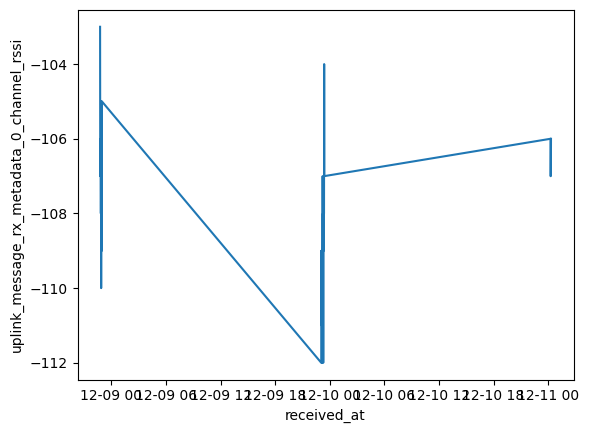

In [21]:
sns.lineplot(data=df.tail(40), x='received_at', y='uplink_message_rx_metadata_0_channel_rssi')
